# Uber Case Study

Project Overview:

Ridesharing involves using a service to secure a ride on short notice. The market for ridesharing experiences significant fluctuations in demand based on various factors such as time, location, weather, and events. To succeed in this industry, it is crucial to understand these demand patterns and ensure the availability of rides when needed.

# Objective:

As a Data Analyst, my task is to extract actionable insights from data to support the growth of the business.

# Questions from Uber Management:

1). What variables influence the number of pickups?

2). Which factor has the most significant impact on the number of pickups? What could be the possible reasons for this?

3). What recommendations do you have for Uber management to capitalize on fluctuating demand?

# Data Description:

The dataset contains details of Uber rides across various boroughs (subdivisions) of New York City on an hourly basis, along with attributes related to weather conditions at those times.

* pickup_dt: Date and time of pickup
* borough: NYC's borough
* pickups: Number of pickups for the period (hourly)
* spd: Wind speed in miles/hour
* vsb: Visibility in miles to the nearest tenth
* temp: Temperature in Fahrenheit
* slp: Sea level pressure
* pcp01: 1-hour liquid precipitation
* pcp06: 6-hour liquid precipitation
* pcp24: 24-hour liquid precipitation
* sd: Snow depth in inches
* hday: Being a holiday (Y) or not (N)

# Importing Necessary Libraries:

In [723]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset

In [726]:
file_location = r"C:\Users\vishc\Uber_Data (1).csv"
df = pd.read_csv(file_location)
df.head()


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,01-01-2015 01:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,01-01-2015 01:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,01-01-2015 01:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,01-01-2015 01:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,01-01-2015 01:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


# Initial Data Exploration:

In [729]:
# Checking the shape of the dataset
shape_df = df.shape
print(shape_df) 

# Checking the data types of columns in the dataset
information_df = df.info()
print(information_df)

# Getting the statistical summary of the dataset
statistical_summary = df.describe()
print(statistical_summary)

(29101, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB
None
            pickups           spd           vsb          temp          dewp  \
count  29101.000000  29101.000000  29101.000000  28742.000000  29101.000000   
mean     490.215903      5.984924      8.818125     47

# Let's check the count of each category in each of the categorical/object type variables.

In [732]:
# Checking unique boroughs
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)

In [734]:
# Checking number ofunique boroughs
df['borough'].nunique()

6

* We can obseve that there are 6 unique boroughs present in the dataset foe New York

In [737]:
# Checking the contribution of Holiday status (Y/N)
H_contri= df['hday'].value_counts(normalize = True)
print(H_contri)

hday
N    0.961479
Y    0.038521
Name: proportion, dtype: float64


# Data Standardization

In [740]:
df['pickup_dt'][:5]

0    01-01-2015 01:00
1    01-01-2015 01:00
2    01-01-2015 01:00
3    01-01-2015 01:00
4    01-01-2015 01:00
Name: pickup_dt, dtype: object

In [742]:
# Converting 'pickup_dt' to datetime format
df['pickup_dt'] =  pd.to_datetime(df['pickup_dt'], format = "%d-%m-%Y %H:%M")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       28742 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


# Time Period of Data Collection:

In [746]:
# Checking the range of time period for which data has been collected
Start_date = df['pickup_dt'].min()
print(Start_Date)

End_date = df['pickup_dt'].max()
print(End_date)


2015-01-01 01:00:00
2015-06-30 23:00:00


# Extracting Date Parts from Pickup Date:

In [749]:
# Extracing date pars from pickup date

# Extracting the year from the date
df['start_year'] = df.pickup_dt.dt.year 

# Extracting the month name from the date
df['start_month'] = df.pickup_dt.dt.month_name()

# Extracting the hour from the time
df['start_hour'] = df.pickup_dt.dt.hour

# Extracting the day from the date
df['start_day'] = df.pickup_dt.dt.day 

# Extracting the day of week from the date
df['week_day'] = df.pickup_dt.dt.day_name() 

df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday


# Handling Missing Values:

In [807]:
# checking missing values across each columns
df.isnull().sum()

pickup_dt        0
borough          0
pickups          0
spd              0
vsb              0
temp           359
dewp             0
slp              0
pcp01            0
pcp06            0
pcp24            0
sd               0
hday             0
start_year       0
start_month      0
start_hour       0
start_day        0
week_day         0
dtype: int64

In [754]:
# Checking the missing values further.
df.borough.value_counts(normalize = True, dropna = False)

borough
Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: proportion, dtype: float64

In [853]:
# Replace the null values present in the borough column with a new label as unknown.
df['borough'].fillna(value = 'Unknown', inplace = True)

# Let's check
df.borough.value_counts(normalize = True, dropna = False)

borough
Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
Unknown          0.104567
Name: proportion, dtype: float64

In [855]:
df.isnull().sum()

pickup_dt        0
borough          0
pickups          0
spd              0
vsb              0
temp           359
dewp             0
slp              0
pcp01            0
pcp06            0
pcp24            0
sd               0
hday             0
start_year       0
start_month      0
start_hour       0
start_day        0
week_day         0
dtype: int64

In [857]:
# Handling missing values in the 'temp' column

df.loc[df['temp'].isnull() == True]

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
8,2015-01-01 02:00:00,Brooklyn,1229,3.0,10.0,NaN,6.0,1023.0,0.0,0.0,0.0,0.0,Y,2015,January,2,1,Thursday
15,2015-01-01 03:00:00,Brooklyn,1601,5.0,10.0,NaN,8.0,1022.3,0.0,0.0,0.0,0.0,Y,2015,January,3,1,Thursday
22,2015-01-01 04:00:00,Brooklyn,1390,5.0,10.0,NaN,9.0,1022.0,0.0,0.0,0.0,0.0,Y,2015,January,4,1,Thursday
29,2015-01-01 05:00:00,Brooklyn,759,5.0,10.0,NaN,9.0,1021.8,0.0,0.0,0.0,0.0,Y,2015,January,5,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,2015-01-15 19:00:00,Brooklyn,594,5.0,10.0,NaN,13.0,1016.2,0.0,0.0,0.0,0.0,N,2015,January,19,15,Thursday
2340,2015-01-15 20:00:00,Brooklyn,620,5.0,10.0,NaN,13.0,1015.5,0.0,0.0,0.0,0.0,N,2015,January,20,15,Thursday
2347,2015-01-15 21:00:00,Brooklyn,607,3.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,21,15,Thursday
2354,2015-01-15 22:00:00,Brooklyn,648,9.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,22,15,Thursday


In [859]:
# Count the occurrences of each unique value in the 'borough' column for rows where 'temp' is NaN.
missing_temp_counts = df.loc[df['temp'].isnull() == True, 'borough'].value_counts()
print(missing_temp_counts)

borough
Brooklyn    359
Name: count, dtype: int64


In [847]:
# Count the occurrences of each unique value in the 'start_month' column for rows where 'temp' is NaN.
df.loc[df['temp'].isnull() == True, 'start_month'].value_counts()

start_month
January    359
Name: count, dtype: int64

In [861]:
# Fixing Temp
df['temp'] = df['temp'].fillna(value = df['temp'].mean())

In [863]:
# Checking the sum of null values across columns
df.isnull().sum()

pickup_dt      0
borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_hour     0
start_day      0
week_day       0
dtype: int64

# Exploratory Data Analysis

# Univariate Analysis

In [867]:
# setting the size of the plots inline
sns.set(rc = {'figure.figsize': (11.7,6.27) })

# Observation on pickups

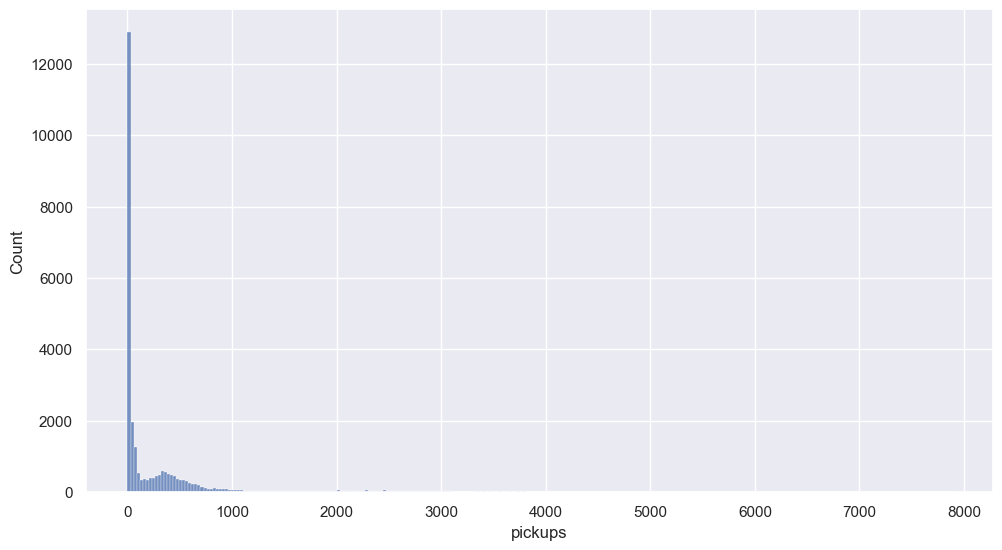

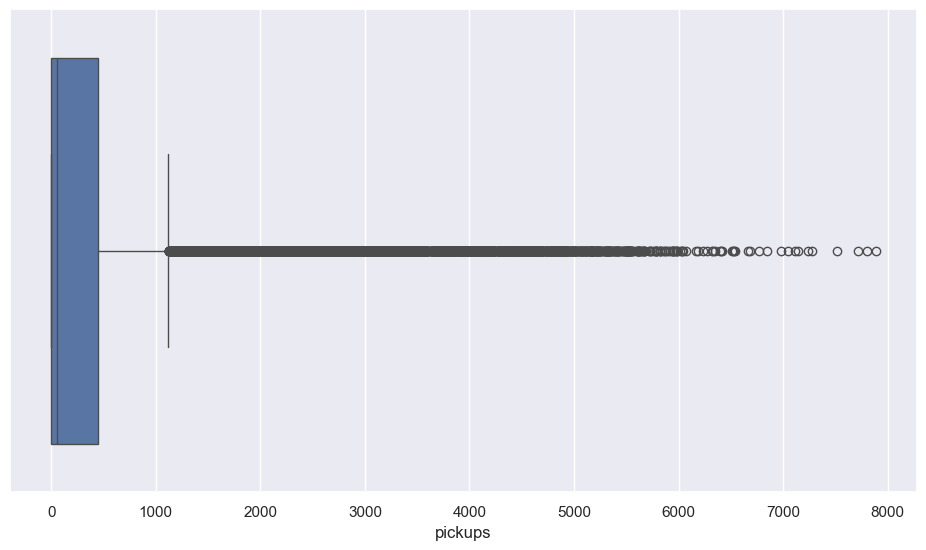

In [869]:
# Getting the pickup distribution
sns.histplot(data = df, x = 'pickups')
plt.show()

# Getting the box plot distribution of pickups
sns.boxplot(data = df, x = 'pickups')
plt.show()

# Observations:

Presence of outliers, skewed distribution, and possible bimodal distribution.


# Observation on Visibility

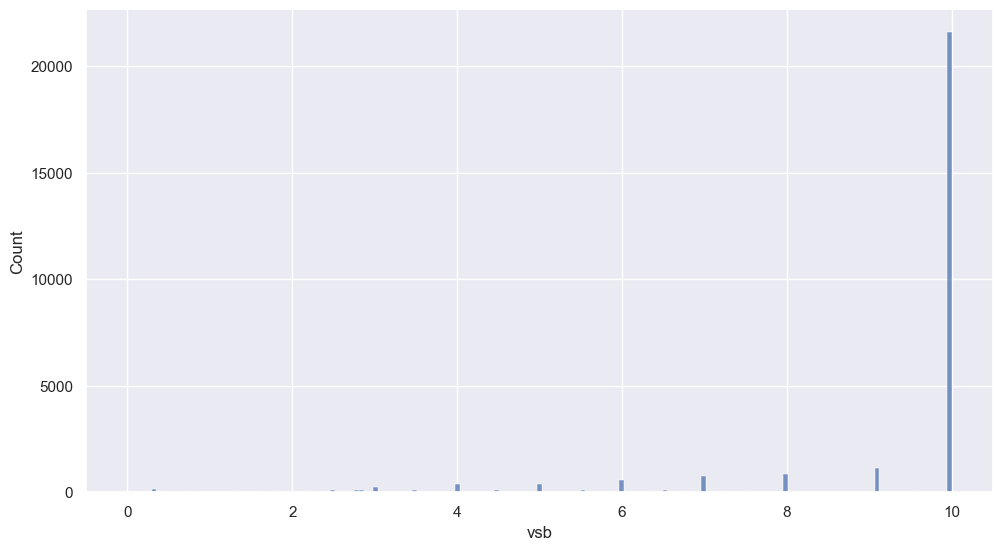

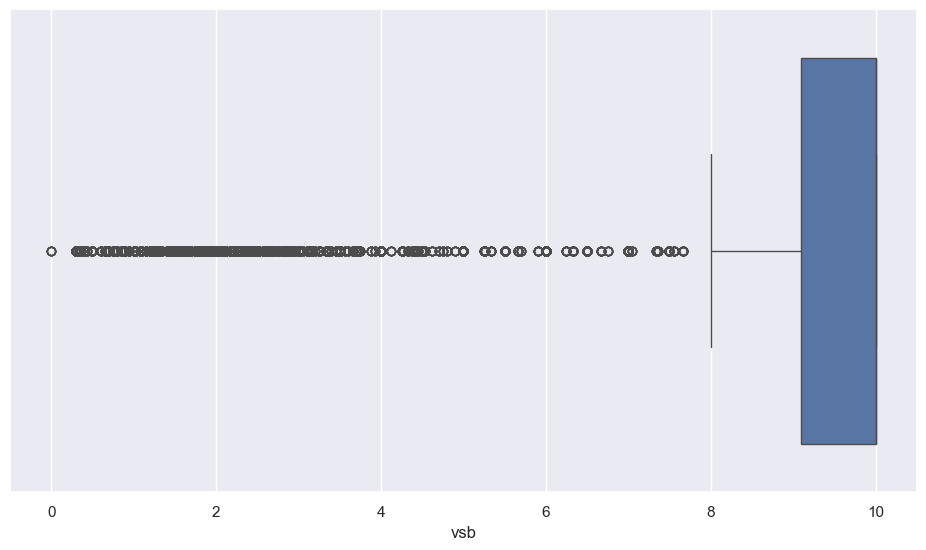

In [872]:
# Getting the visibility in miles
sns.histplot(data = df, x = 'vsb')
plt.show()

# Getting the box plot distribution for visibility in miles
sns.boxplot(data = df, x = 'vsb')
plt.show()

# Observations:

Outliers present, generally ranges between 9 to 10 miles

# Observation on Temperature

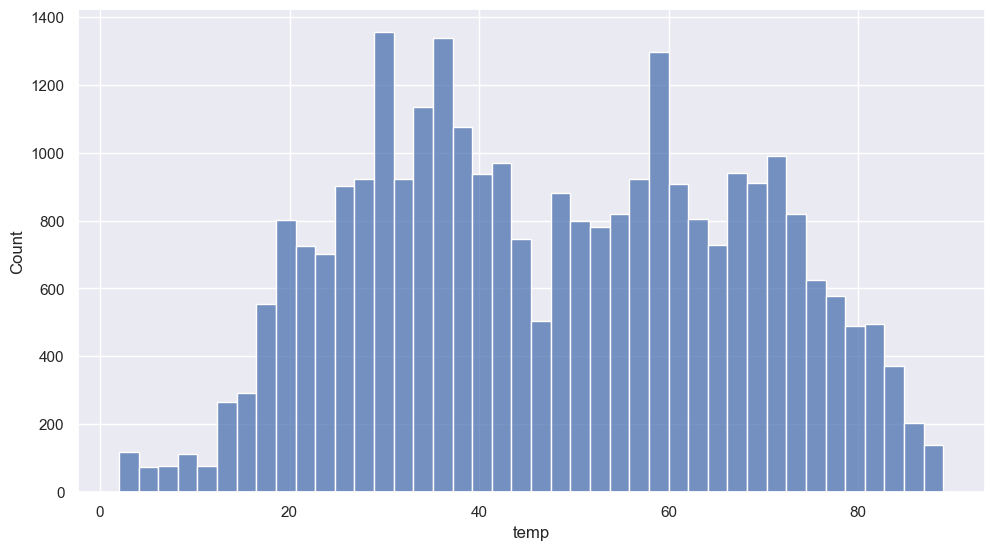

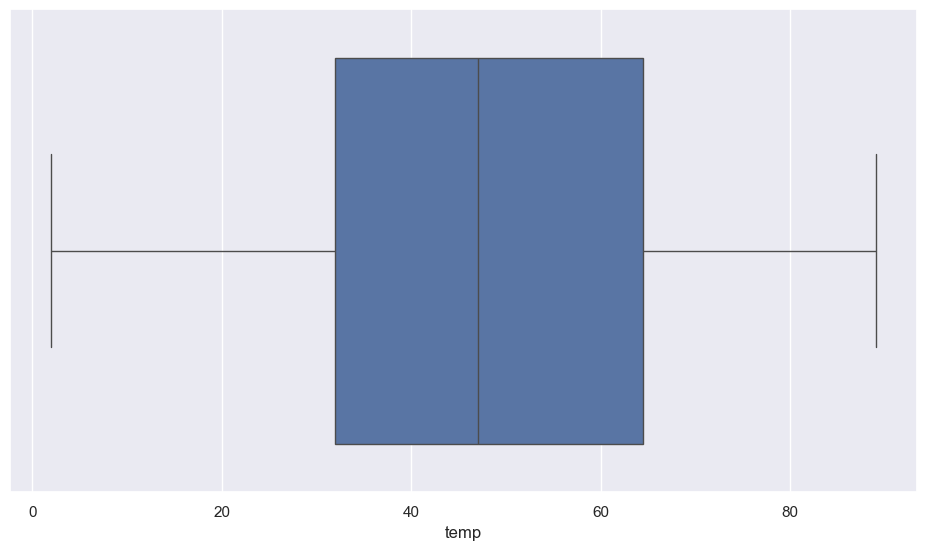

In [875]:
sns.histplot(data = df, x = 'temp')
plt.show()

sns.boxplot(data = df, x = 'temp')
plt.show()

# Observations:

Nicely distributed, no major issues.

# Observation on Dew point

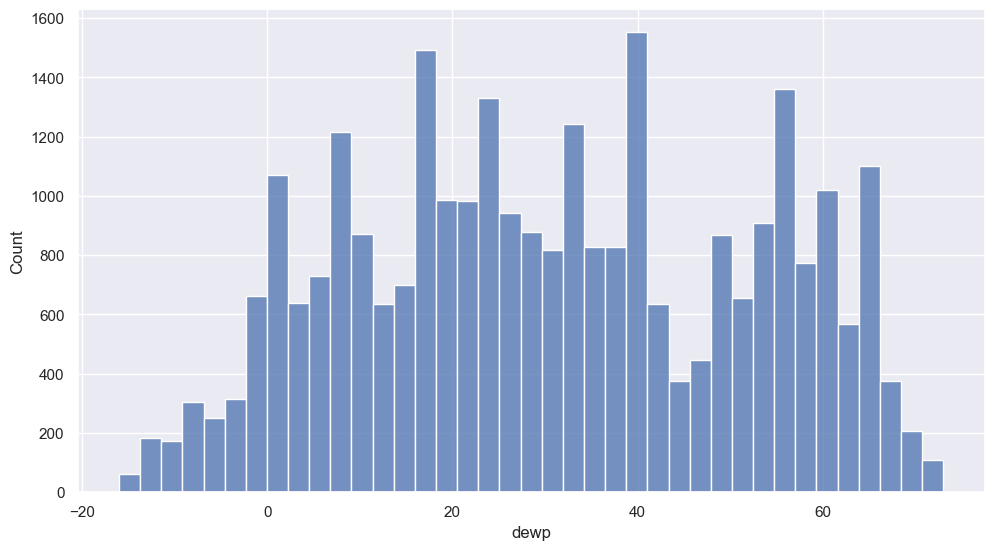

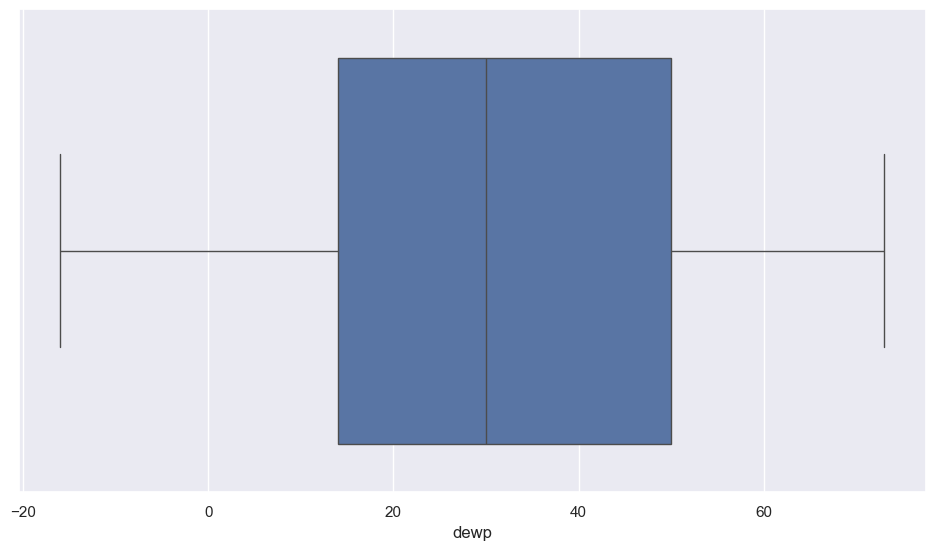

In [878]:
sns.histplot(data = df, x = 'dewp')
plt.show()

sns.boxplot(data = df, x = 'dewp')
plt.show()

# Observations:

No significant issues.

# Observation on sea level pressure

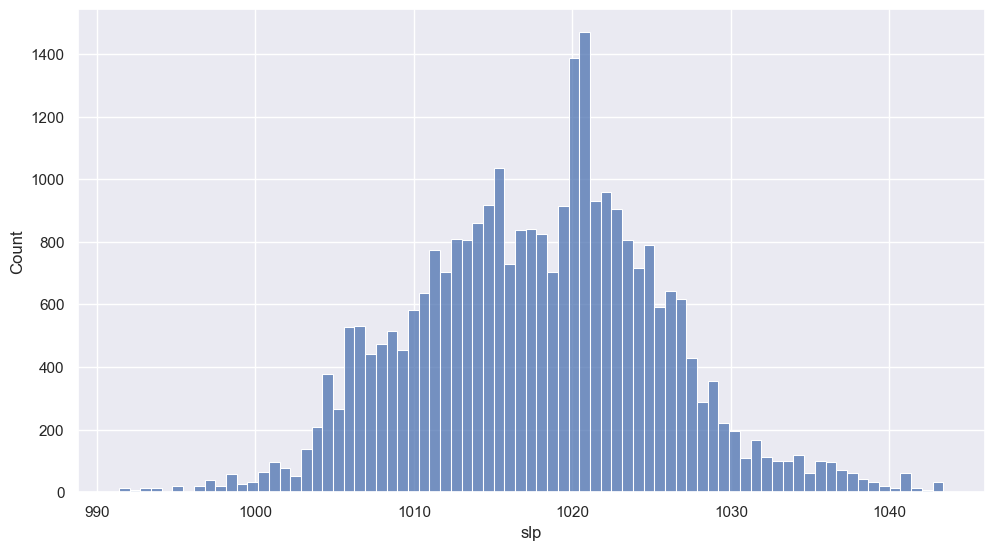

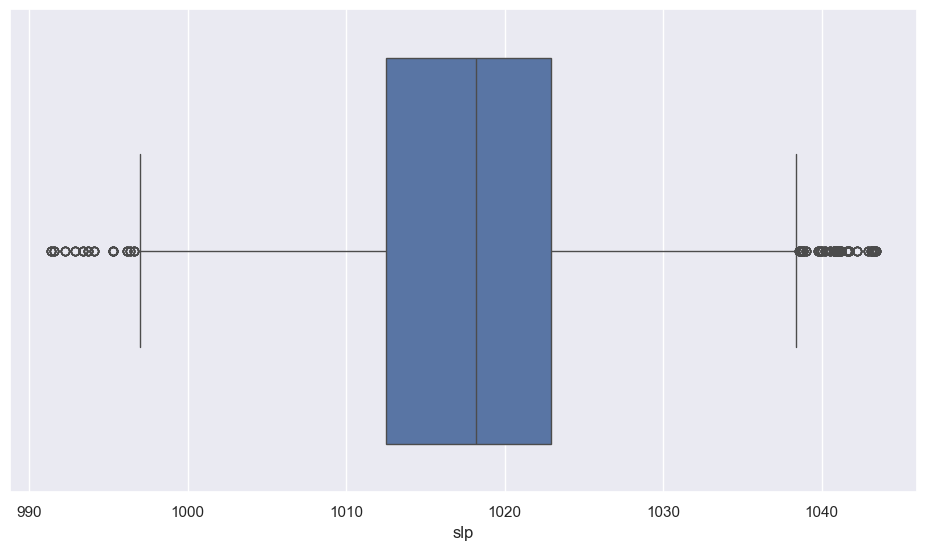

In [370]:
sns.histplot(data = df, x = 'slp')
plt.show()

sns.boxplot(data = df, x = 'slp')
plt.show()

# Observations:

Some outliers present but not alarming.

# Observation on Liquid Precipitation (Rain)


# 1 hour liquid Precipitation

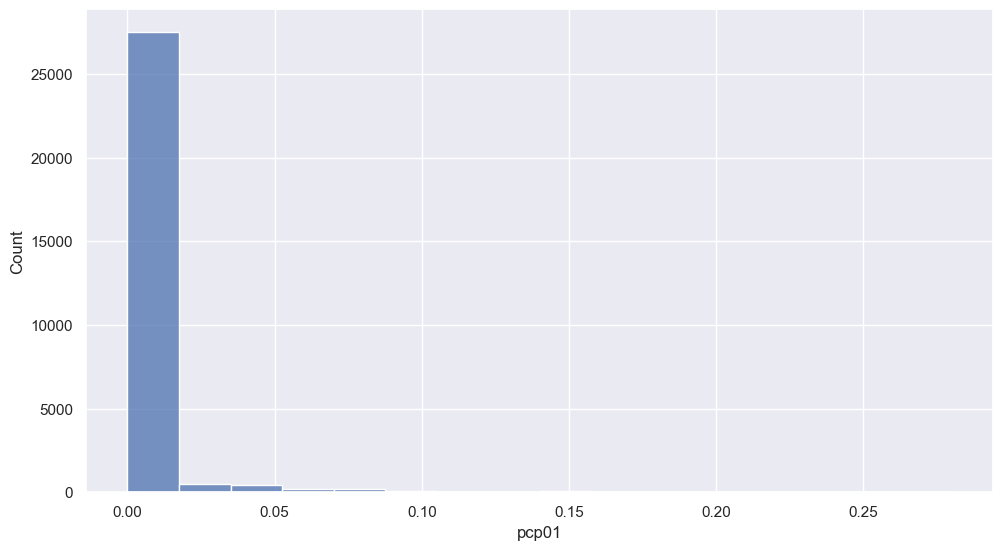

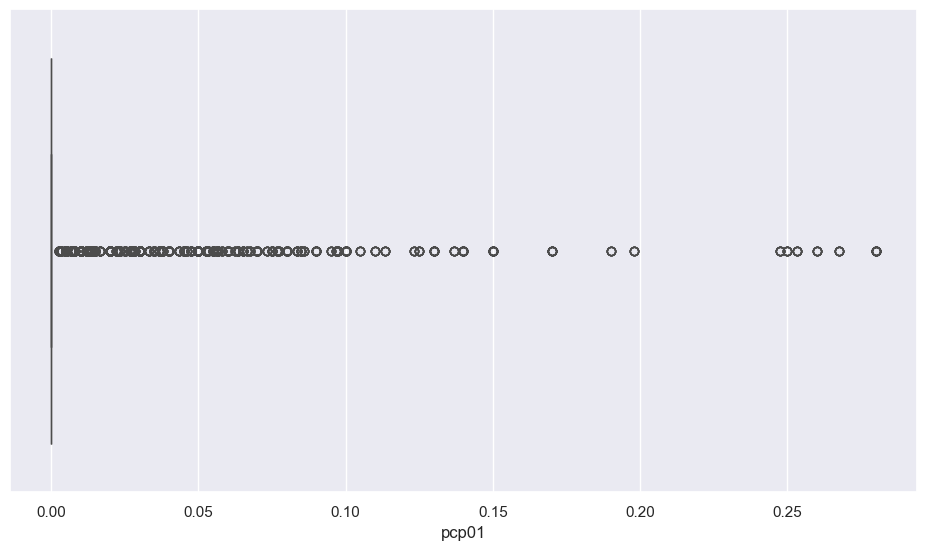

In [435]:
sns.histplot(data = df, x = 'pcp01')
plt.show()

sns.boxplot(data = df, x = 'pcp01')
plt.show()

# Observation

A lot of skewness in 1 hour liquid Precipitation.

# 6 hour liquid Precipitation

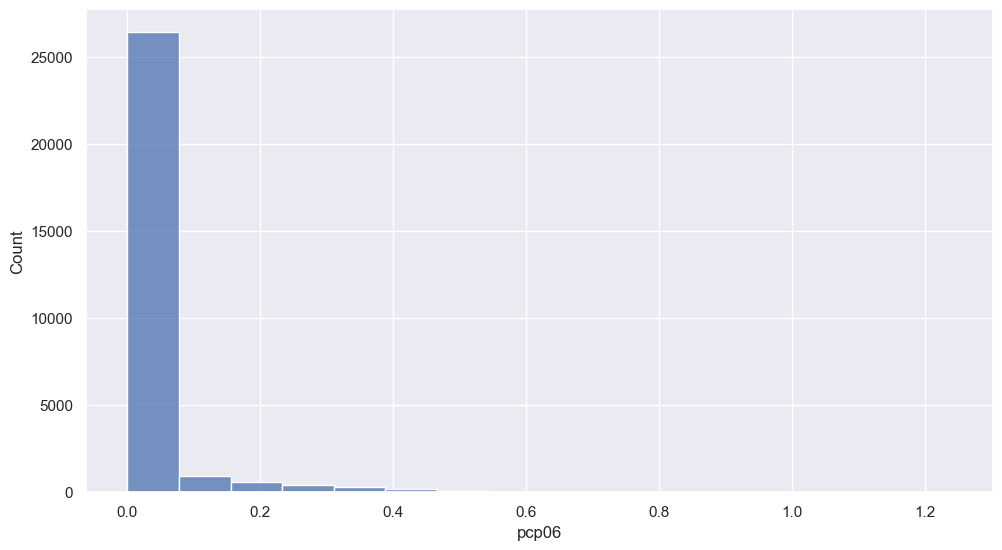

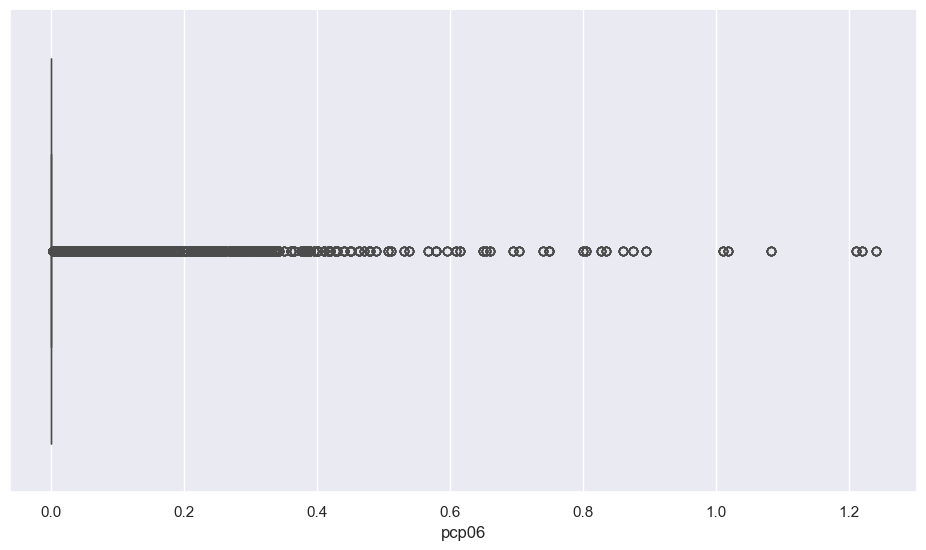

In [883]:
sns.histplot(data = df, x = 'pcp06')
plt.show()

sns.boxplot(data = df, x = 'pcp06')
plt.show()

# Observation:

A lot of skewness in61 hour liquid Precipitation.

# 24 hour liquid Precipitation

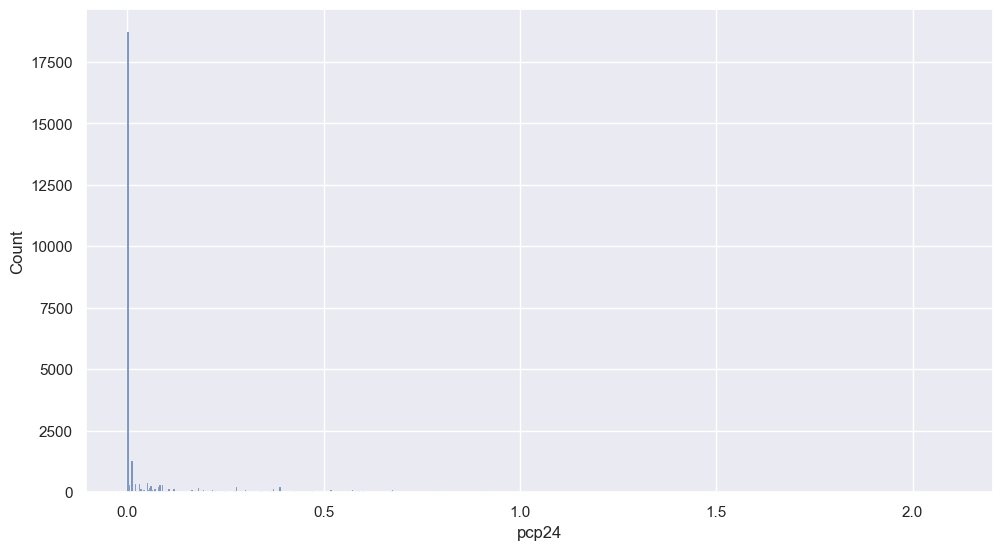

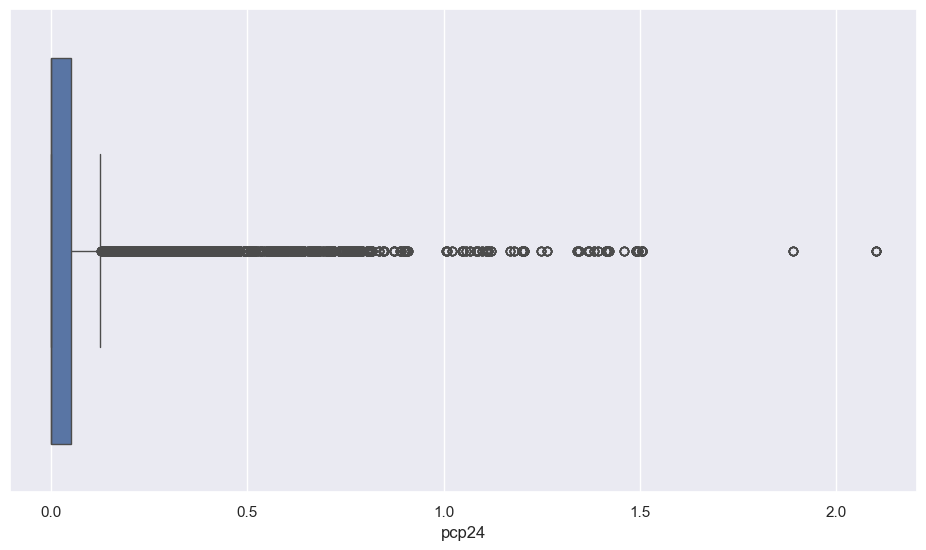

In [886]:
sns.histplot(data = df, x = 'pcp24')
plt.show()

sns.boxplot(data = df, x = 'pcp24')
plt.show()

# Observation:

I see a lot of outliers in 24 hour liquid Precipitation as well

# Observation on Snow depth

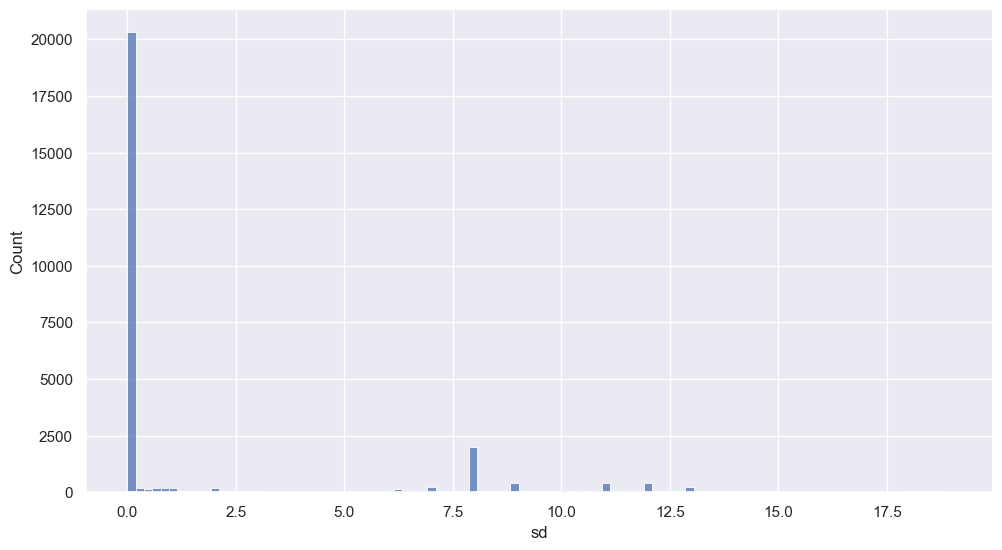

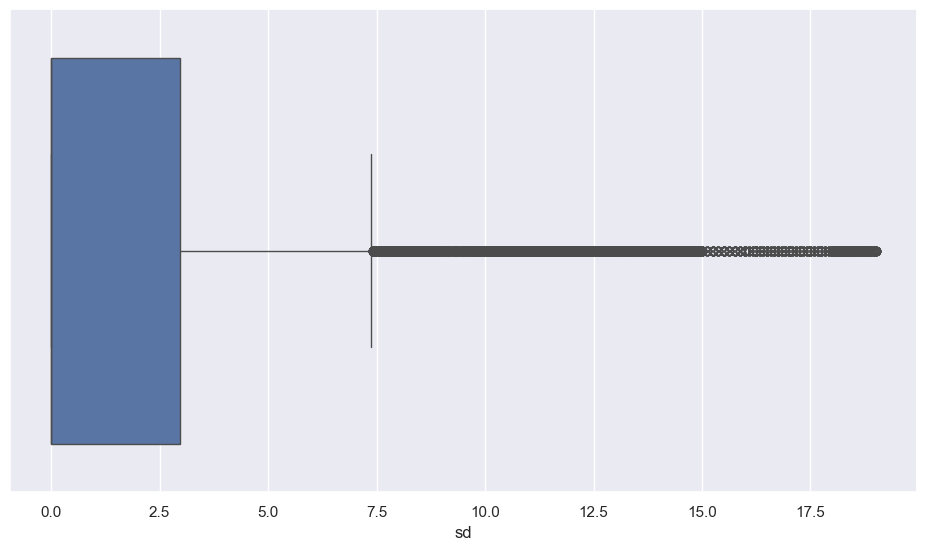

In [373]:
sns.histplot(data = df, x = 'sd')
plt.show()

sns.boxplot(data = df, x = 'sd')
plt.show()

# Observation:

I see a lot of outliers for snow depth as well.

# Let's explore the categorical variables

# Observation on holiday

In [892]:
# Check the distribuion og N/Y in hday column
df.hday.value_counts(normalize = True, dropna = False)

hday
N    0.961479
Y    0.038521
Name: proportion, dtype: float64

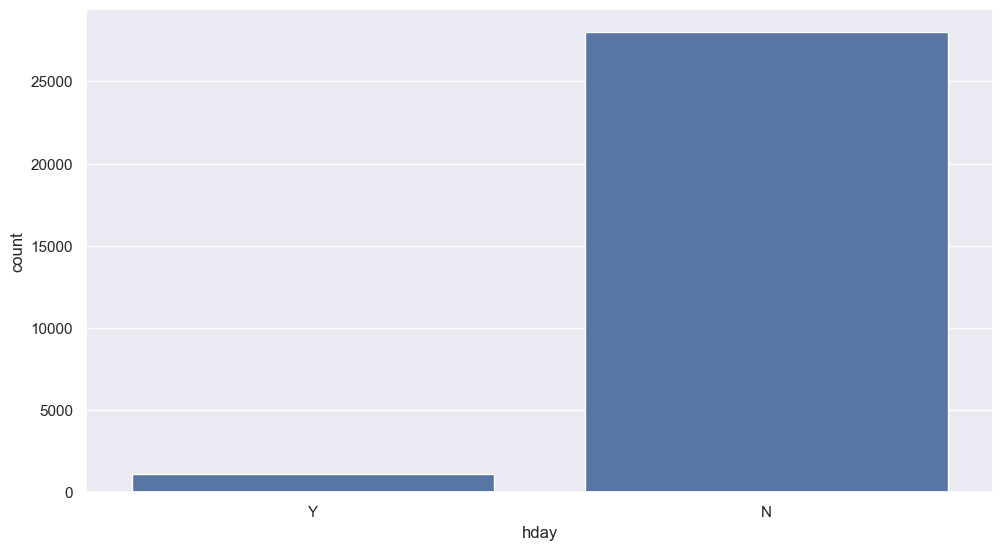

In [898]:
# Getting the distribution for holiday variables
sns.countplot(data = df, x = 'hday')
plt.show()

# Observation:

* Category Distribution: The vast majority of rows (90%) belong to the category N, indicating that these observations were recorded on non-holiday days.

* Minority Category: Only 3.8% of the rows are in the category Y, showing that these observations were recorded on holidays.

# Observation on holiday

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'EWR'),
  Text(3, 0, 'Manhattan'),
  Text(4, 0, 'Queens'),
  Text(5, 0, 'Staten Island'),
  Text(6, 0, 'Unknown')])

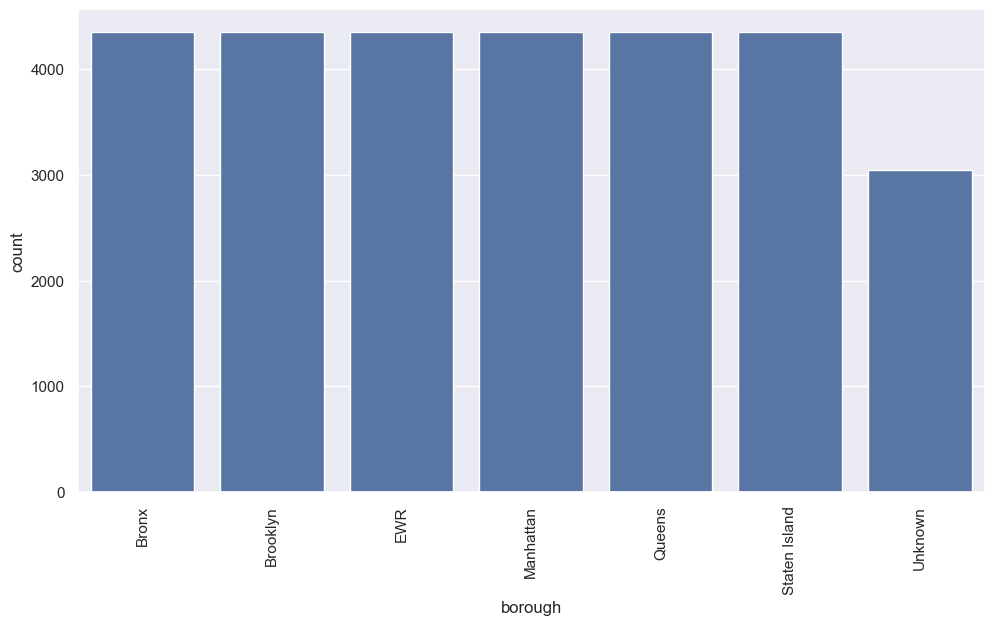

In [907]:
sns.countplot(data = df, x = 'borough')

plt.xticks(rotation = 90)

# Bivariate Analysis

# Correlation by Heatmap

In [910]:
# Check for correlation among numerical variables
num_var = ['pickups','spd','vsb','temp','dewp','slp','pcp01','pcp06','pcp24','sd']
corr = df[num_var].corr()
corr

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickups,1.000000,0.011103,-0.007484,0.054146,0.033456,-0.015011,0.004406,-0.002909,-0.020219,-0.008241
spd,0.011103,1.000000,0.089056,-0.291805,-0.321730,-0.091698,-0.000250,0.016266,-0.010563,0.097919
vsb,-0.007484,0.089056,1.000000,0.026400,-0.232188,0.165451,-0.487121,-0.117681,0.000323,-0.048110
temp,0.054146,-0.291805,0.026400,1.000000,0.889635,-0.213800,-0.014114,-0.039662,-0.016387,-0.558519
dewp,0.033456,-0.321730,-0.232188,0.889635,1.000000,-0.310104,0.115585,0.012435,0.001250,-0.492485
slp,-0.015011,-0.091698,0.165451,-0.213800,-0.310104,1.000000,-0.088466,-0.103059,-0.133964,0.123538
pcp01,0.004406,-0.000250,-0.487121,-0.014114,0.115585,-0.088466,1.000000,0.126185,0.001017,-0.000974
pcp06,-0.002909,0.016266,-0.117681,-0.039662,0.012435,-0.103059,0.126185,1.000000,0.253583,0.040092
pcp24,-0.020219,-0.010563,0.000323,-0.016387,0.001250,-0.133964,0.001017,0.253583,1.000000,0.070604
sd,-0.008241,0.097919,-0.048110,-0.558519,-0.492485,0.123538,-0.000974,0.040092,0.070604,1.000000


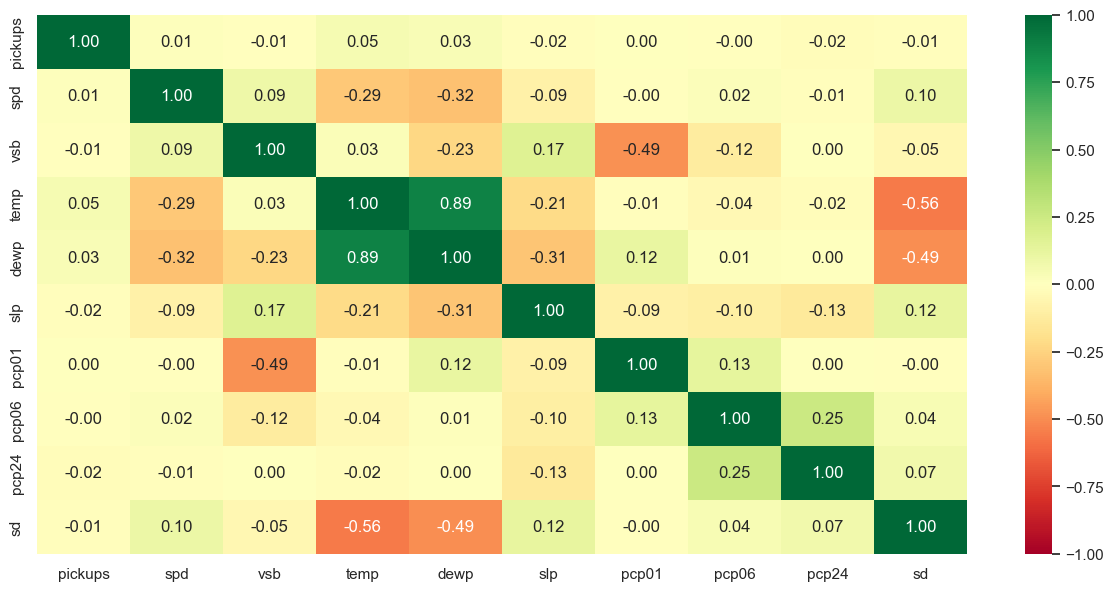

In [912]:
# Plot the heatmap
plt.figure(figsize=(15,7))
sns.heatmap(data = corr,  annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "RdYlGn")
plt.show()

# What did you observe?

1. Temperature and Dew Point: There is a strong positive correlation (0.89) between temperature (temp) and dew point (dewp),  indicating that as the temperature increases, the dew point also tends to increase.

2. Temperature and Visibility: There is a moderate negative correlation (-0.49) between temperature (temp) and visibility    (vsb), suggesting that higher temperatures are associated with lower visibility.

3. Dew Point and Visibility: Dew point (dewp) also shows a moderate negative correlation (-0.49) with visibility (vsb),   indicating that higher dew points are associated with lower visibility.

4. Visibility and Precipitation: Visibility (vsb) has a noticeable negative correlation (-0.49) with pcp01, suggesting that higher precipitation is associated with lower visibility.

5. Temperature and Standard Deviation: There is a moderate negative correlation (-0.56) between temperature (temp) and standard deviation (sd), implying that higher temperatures are associated with lower variability in the data.

6. Dew Point and Standard Deviation: Dew point (dewp) also shows a moderate negative correlation (-0.49) with standard deviation (sd), indicating that higher dew points are associated with lower variability.

7. Precipitation Correlations:

* pcp01 and pcp06 have a strong positive correlation (1.00), suggesting they measure similar or related aspects of  precipitation.
* pcp06 and pcp24 also have a strong positive correlation (0.25), indicating that different measures of precipitation are positively related.

8. Pickup Count and Other Variables: The pickup count (pickups) has weak correlations with other variables, indicating that it might be influenced by factors not captured in this heatmap.

Now let's check the trend of pickups across different time based variables



# Pickups across months

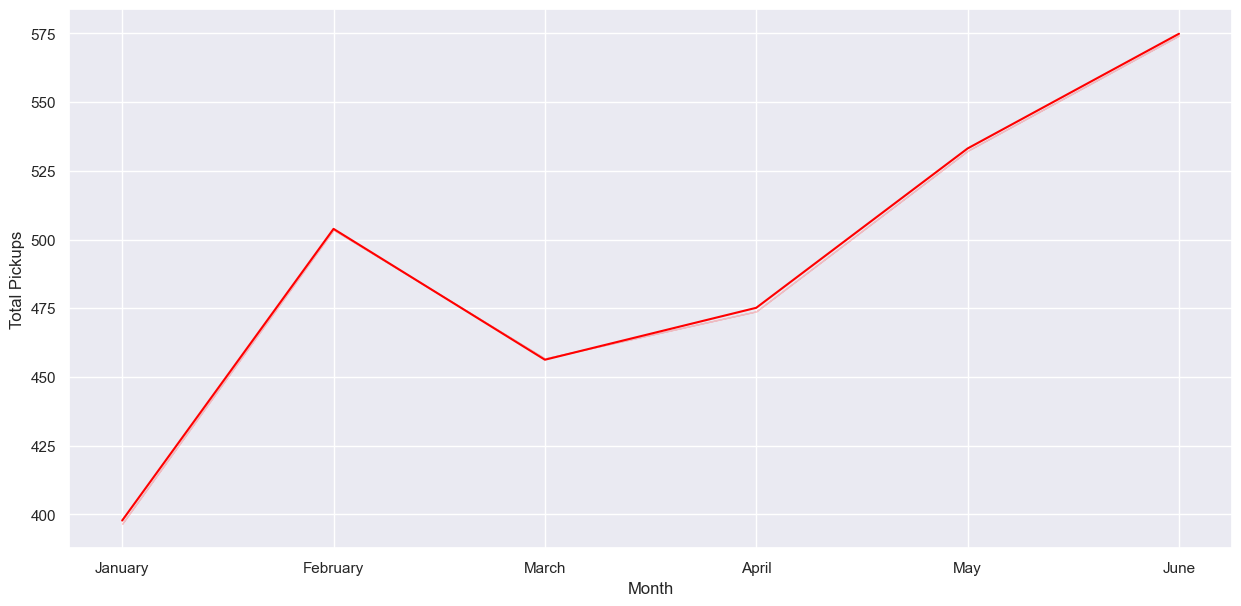

In [565]:
# Understanding the trend of pickups across months
cats = df.start_month.unique().tolist()
df.start_month = pd.Categorical(df.start_month, ordered = True, categories = cats)

plt.figure(figsize = (15,7))
sns.lineplot(data = df, x = 'start_month', y= 'pickups',  errorbar = ('ci', False), color = 'red', estimator = 'mean')
plt.ylabel('Total Pickups')
plt.xlabel('Month')
plt.show()


# What did you observe?

Uber over month on month is actully doing good with respect to pickups.

Pickups have increased as the year has progressed. June has been the month where the pickups have been the maximum and January was the month where pickups has been the minimum.

# Pickups vs Days of the months

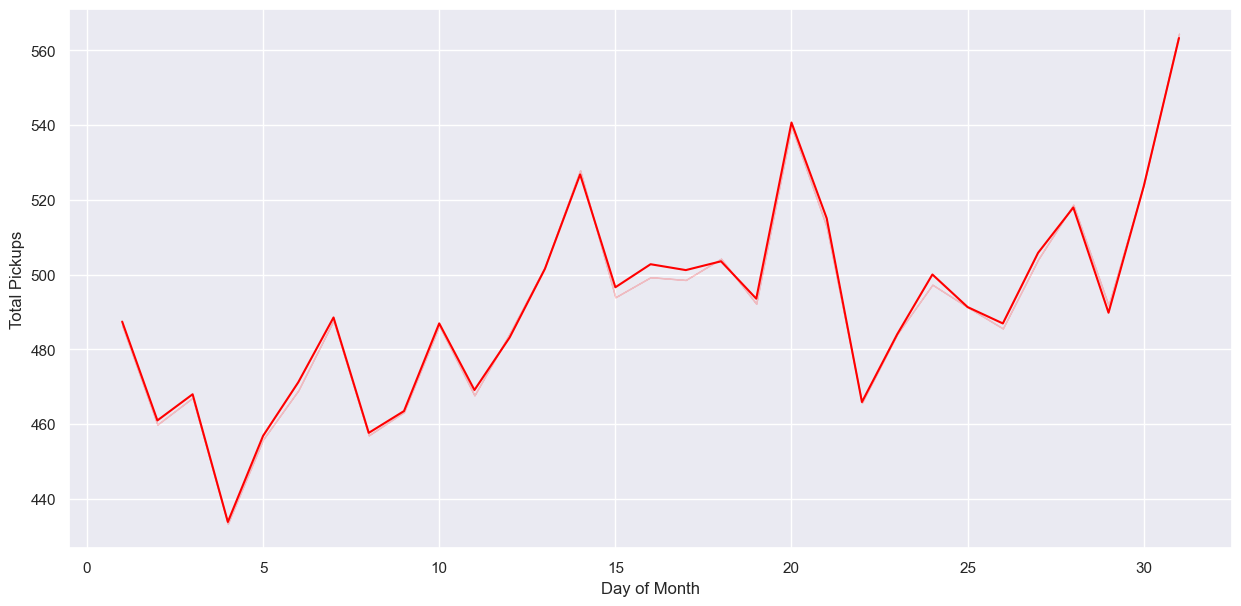

In [561]:
plt.figure(figsize = (15,7))
sns.lineplot(data = df, x = 'start_day', y= 'pickups',  errorbar = ('ci', False), color = 'red', estimator = 'mean')
plt.ylabel('Total Pickups')
plt.xlabel('Day of Month')
plt.show()

# What did you observe?

It's looks like as the month increases there is increase in the pickups.

I know the last three values probably might not be the right reflection  because 30, 31 and 29 might not present in all the columns.

But general trends i see the as the month increases there is more and more pickups which is happening across the different different months.

# Pickups across Hours of the Day

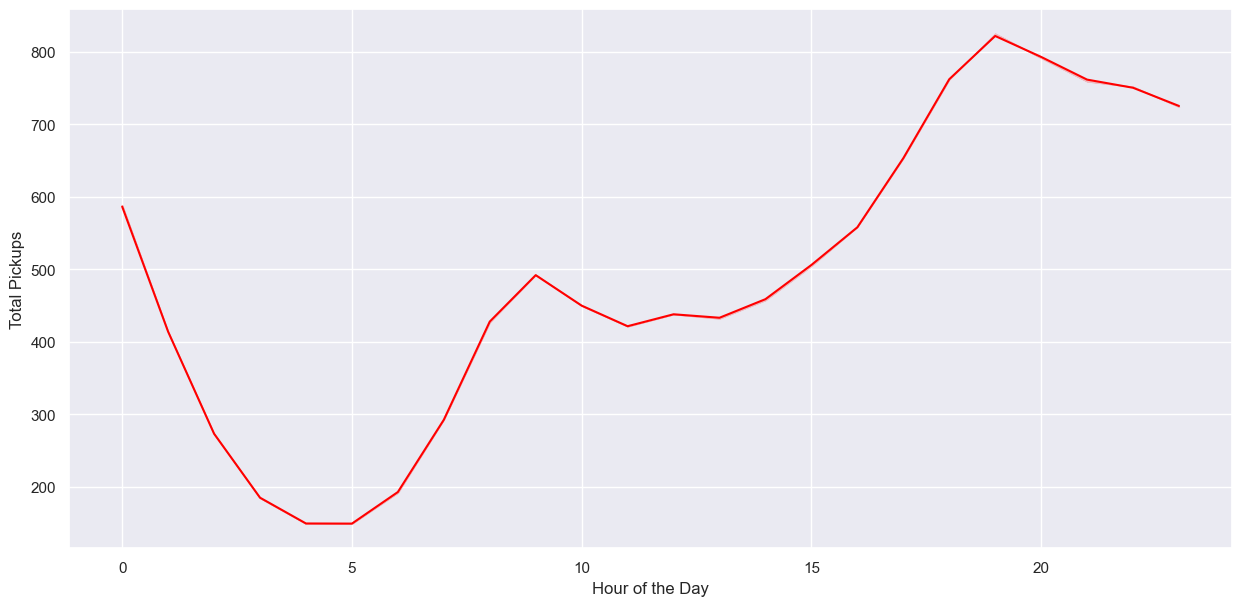

In [559]:
plt.figure(figsize = (15,7))
sns.lineplot(data = df, x = 'start_hour', y= 'pickups',  errorbar = ('ci', False), color = 'red', estimator = 'mean')
plt.ylabel('Total Pickups')
plt.xlabel('Hour of the Day')
plt.show()

# What did you observe?

It is little high around 12 o'clock in the night. and then it is decreasing till 5 o'clock and then picks again and goes around 9 o'clock and ten slightly little flatter and then again picks around 7 or 8 o'clock in the evening.

# What is the trends of Pickups across Weekdays

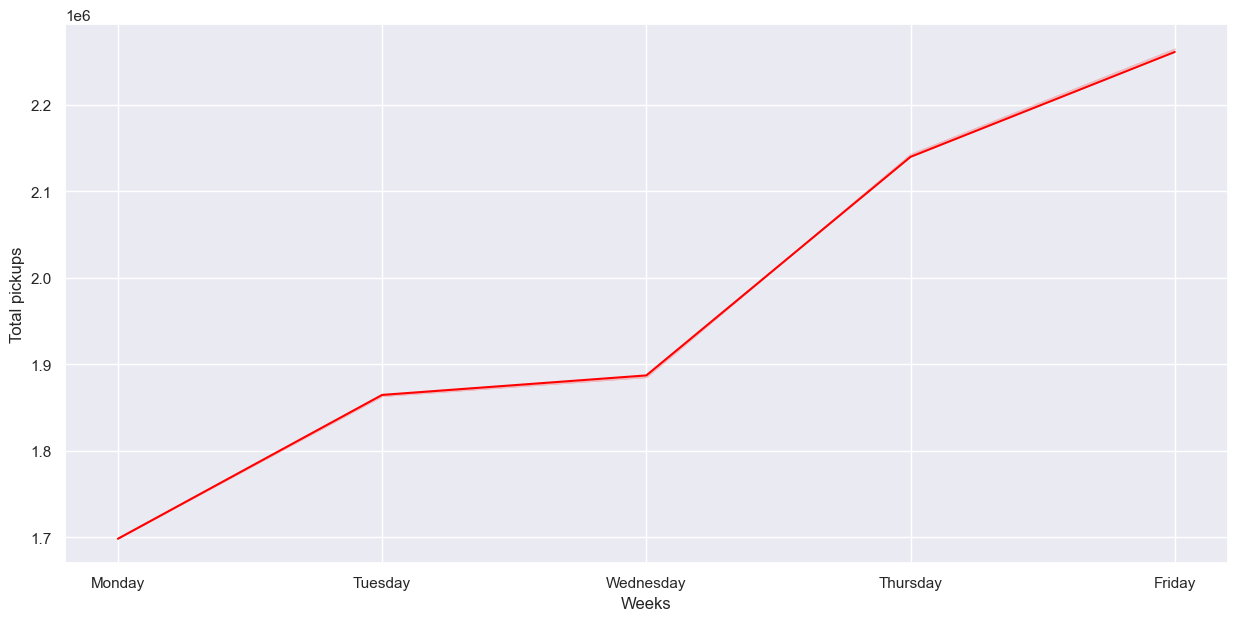

In [563]:
# Getting the trend of pickups across weekdays
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' 'Sunday']
df.week_day = pd.Categorical(df.week_day, ordered = True, categories = cats)

plt.figure(figsize = (15,7))
sns.lineplot(data = df, x = 'week_day', y = 'pickups', ci = False, color = 'red', estimator = 'sum')
plt.ylabel('Total pickups')
plt.xlabel('Weeks')
plt.show()

# What did you observe?

Here I can see that Friday shows some attraction across the different days of the week.
Monday, Tuesday, and Wednesday are still smaller than Friday.

# Pickups across the different borough

<Axes: xlabel='borough', ylabel='pickups'>

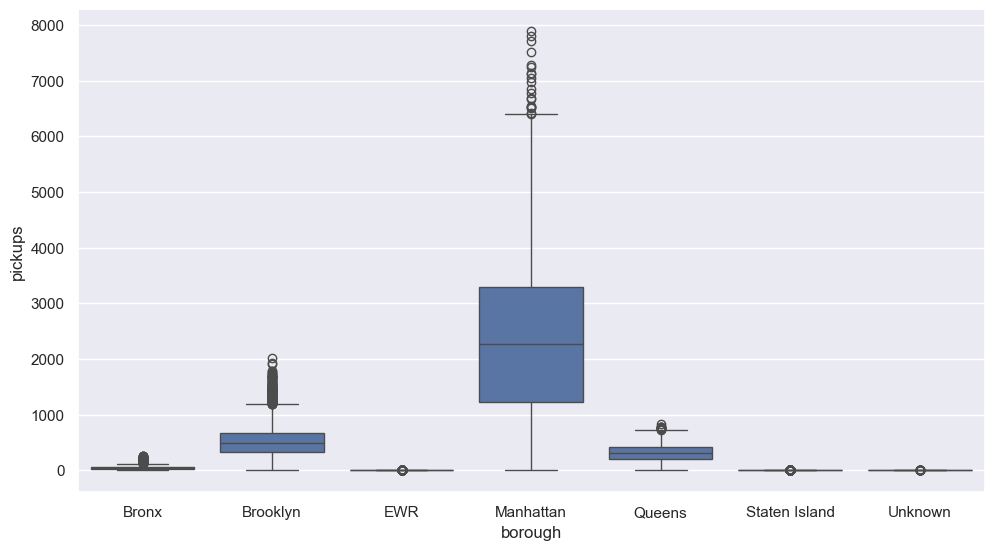

In [581]:
# Bivariate
sns.boxplot(data = df, y= 'pickups', x = 'borough')

# Numerical-Categorical

# What did you observe?

Across the different boroughs, I have the pickups stats and I can see Manhattan has more pickups

# Insights

* Popularity: Uber is highly popular in Manhattan.

* Peak Hours: Ride demand is high during 8-10 am and sees another surge around 7 pm.

* Seasonal Performance: Uber's performance declines during the winter months.

* Rising Trend: There is a noticeable increase in rides from January to June.

* High Demand on Fridays: Ride numbers are particularly high on Fridays.

* Data Issues: Numerous outliers are present due to null values.

* Brooklyn Outliers: Brooklyn has a significant number of outliers.


# Recommendation
Providing better service in Manhattan could introduce more price dynamics in the area. However, it might not be ideal to apply the same strategy in EWR and Staten Island. To effectively capture this market, consider offering more discounts and increasing the number of rides available between 8-10 am and 7 pm, ensuring that you maintain your core business.

In [ ]:
PROFESSIONAL SUMMARY
Detail-oriented Data Analyst with hands-on experience in data extraction, transformation, and analysis. Proficient in Advanced Excel, PostgreSQL, Power BI, and Python, with a solid foundation in statistical analysis. Demonstrated ability to create insightful reports and dashboards to drive business decisions. Eager to apply analytical skills and technical expertise in an entry-level role to contribute to data-driven decision-making.
